# Results summary -SVC with py activation maps

### Multiclass model (Hyper, Neutral_hyper, Hypo, Neutral_hypo) without pca
- 40 % accuracy (chance = 25%)
- Chi-square test on the confusion matrix : χ2 = 103.38, p < .00001
- hyper vs hypoalgesia : 73 % accuracy with χ2 = 32.58, p < .00001
- Nhypo vs Nhyper : 70% accuracy with χ2 = 30.37, p < 0.00001 
### Multiclass model (Hyper, Neutral_hyper, Hypo, Neutral_hypo) with pca
- 37 % accuracy (chance = 25%)
- Chi-square test on the confusion matrix : χ2 = 83.15 p < .00001
- Khi2 statistic = 83.148399 and p value = 0.000000 
- hyper vs hypoalgesia : 72 % accuracy with χ2 = 25.27 and p value = 0.000003

### Train on hyper run (hyper + N_hyper) and test on hypo run (hypo + N_hypo)
- 47 % accuracy
- Khi2 statistic = 4.16 and p value = 0.12
### Train on Hypo run and tested on Hyper run
- 49 % accuracy
- Khi2 statistic = 1.85 and p value = 0.39
### Train on modulation (hyper vs hypo) and tested on neutral cond. (N_hyper vs N_hypo)
- 59 % accuracy
- Khi2 statistic = 50.12 and p value = 0.000000 
### Run Hypo&nHypo vs run Hyper&nHyper
- 66 % acuracy
- Khi2 statistic = 56.56 and p value = 0.000000 
### Model on ANA run (Hypo vs N_hypo)
- 52 % accuracy          
- Khi2 statistic = 0.78 and p value = 0.68
### Model on Hyper run (hyper vs N_hyper)
- 54 % accuracy
- Khi2 statistic = 4.33 and p value = 0.11 


# Results summary -SVC with SPM TxT activation maps

### Multiclass model (Hyper, Neutral_hyper, Hypo, Neutral_hypo) without pca
- 40 % accuracy (chance = 25%)
- Chi-square test on the confusion matrix : χ2 = 103.38, p < .00001
- hyper vs hypoalgesia : 73 % accuracy with χ2 = 32.58, p < .00001
- Nhypo vs Nhyper : 70% accuracy with χ2 = 30.37, p < 0.00001 
### Multiclass model (Hyper, Neutral_hyper, Hypo, Neutral_hypo) with pca
- 37 % accuracy (chance = 25%)
- Chi-square test on the confusion matrix : χ2 = 83.15 p < .00001
- Khi2 statistic = 83.148399 and p value = 0.000000 
- hyper vs hypoalgesia : 72 % accuracy with χ2 = 25.27 and p value = 0.000003

### Train on hyper run (hyper + N_hyper) and test on hypo run (hypo + N_hypo)
- 47 % accuracy
- Khi2 statistic = 4.16 and p value = 0.12
### Train on Hypo run and tested on Hyper run
- 49 % accuracy
- Khi2 statistic = 1.85 and p value = 0.39
### Train on modulation (hyper vs hypo) and tested on neutral cond. (N_hyper vs N_hypo)
- 59 % accuracy
- Khi2 statistic = 50.12 and p value = 0.000000 
### Run Hypo&nHypo vs run Hyper&nHyper
- 66 % acuracy
- Khi2 statistic = 56.56 and p value = 0.000000 
### Model on ANA run (Hypo vs N_hypo)
- 52 % accuracy          
- Khi2 statistic = 0.78 and p value = 0.68
### Model on Hyper run (hyper vs N_hyper)
- 54 % accuracy
- Khi2 statistic = 4.33 and p value = 0.11 


In [ ]:
# Decoding visualization

In [1]:
### Load dataimport os
import pickle
import numpy as np
import os
import glob

In [2]:
main_path = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\final_GSS\ANA_HYPER'
ls_dir = [os.path.join(main_path,x) for x in os.listdir(main_path) if 'SPM' in x]
print(ls_dir)


[]


In [8]:
os.chdir(main_path)
pwd = os.getcwd()
print(pwd)
with open('final_results.pickle', 'rb') as handle:
        final_results = pickle.load(handle)
with open('final_model_SVC.pickle', 'rb') as handle:
        model = pickle.load(handle)  
with open('kfold_results.pickle', 'rb') as handle:
        kfold_results = pickle.load(handle) 

classes = ['HYPO', 'HYPER'] #['N_HYPO', 'HYPO', 'N_HYPER', 'HYPER']

E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\final_GSS\ANA_HYPER


## Kfold results


In [6]:
# kfold_results
kfold_metrics = kfold_results['df_fold_metrics'] 
kfold_cm =  kfold_results['confusion_matrix'] 
kfold_roc_auc = kfold_results['roc_auc_ovo'] 
n_componentsPCA = kfold_results['pca_n_components']
print(n_componentsPCA, kfold_metrics)

0.8              accuracy balanced_accuracy precision
fold1        0.472222          0.472222  0.433302
fold2        0.517361          0.517361  0.527341
fold3        0.527778          0.527778  0.553651
fold4        0.496528          0.496528  0.492586
fold5        0.506944          0.506944  0.511084
final_model       NaN               NaN       NaN


### K_fold confusion matrices

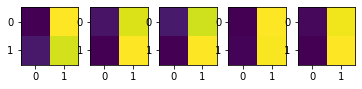

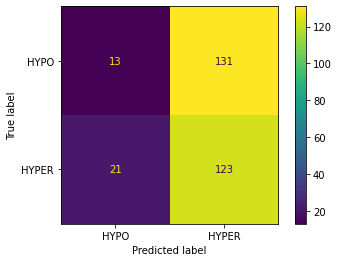

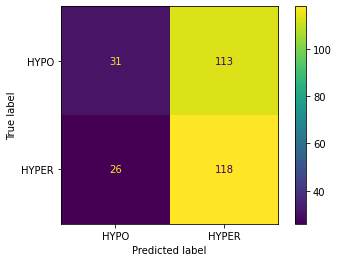

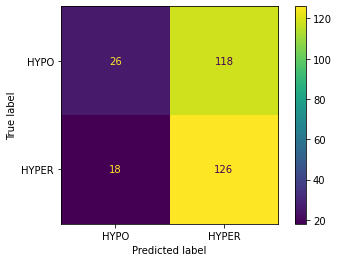

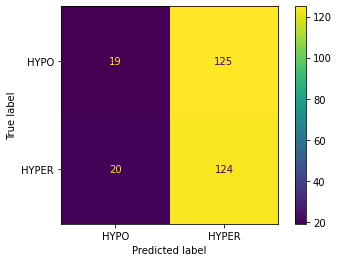

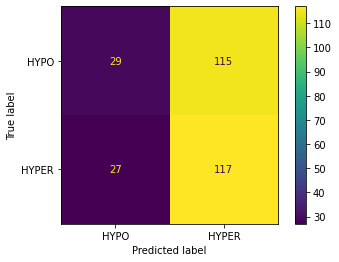

In [9]:
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import ConfusionMatrixDisplay

f, axarr = plt.subplots(1,5)
i = 0
for i, element in enumerate(kfold_cm.keys()):
    cm = kfold_cm[element]
    cm_display = ConfusionMatrixDisplay(cm, display_labels =  classes).plot()
    
    axarr[i].imshow(kfold_cm[element],interpolation='nearest')
    


## Multiclass model
- decision_function : is a (Y_test.shape[0], nb. classes) dim array. It gives the distance of each sample to the hyperplane 

In [58]:
final_results

{'y_pred_metrics':    accuracy  balanced_accuracy  precision
 0  0.584466           0.578424   0.670557,
 'Y_pred': array([4, 3, 4, 3, 2, 1, 1, 1, 3, 4, 2, 2, 3, 4, 2, 4, 4, 4, 4, 1, 1, 3,
        4, 4, 4, 4, 4, 1, 2, 3, 3, 4, 2, 4, 4, 4, 3, 2, 3, 4, 4, 3, 1, 4,
        4, 4, 3, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 1, 4, 3, 4, 3, 4, 1,
        2, 4, 4, 4, 4, 3, 1, 1, 1, 4, 4, 4, 1, 4, 3, 2, 4, 1, 4, 4, 4, 1,
        4, 3, 3, 1, 4, 4, 2, 4, 2, 4, 4, 4, 4, 3, 2, 4, 1, 1, 3, 4, 4, 3,
        4, 1, 4, 3, 1, 4, 2, 4, 4, 4, 2, 2, 3, 4, 2, 4, 4, 1, 4, 4, 1, 1,
        4, 4, 4, 1, 2, 3, 2, 4, 3, 4, 3, 2, 2, 4, 4, 3, 4, 4, 3, 3, 2, 3,
        4, 4, 4, 3, 4, 1, 1, 2, 4, 4, 2, 3, 2, 4, 4, 4, 4, 2, 4, 3, 4, 4,
        4, 4, 1, 4, 2, 4, 1, 4, 3, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 2, 3,
        4, 4, 2, 4, 1, 4, 4, 4, 1, 1, 4, 4, 1, 3, 2, 3, 4, 4, 1, 4, 1, 3,
        4, 2, 4, 4, 3, 4, 4, 2, 2, 4, 4, 3, 4, 2, 3, 2, 4, 1, 4, 3, 4, 4,
        1, 2, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 1, 2, 4, 2, 4, 4, 2, 3, 3, 

### Confusion matrix of final model

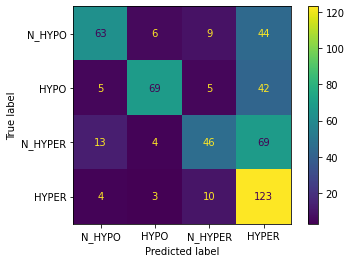

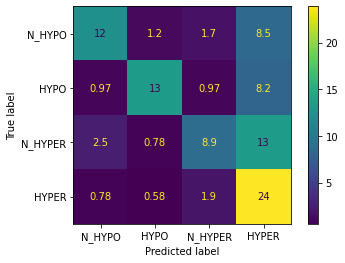

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = final_results['confusion_matrix']
#cm = np.array([[ 63,   6,   9,  44],[  5,  69,   5,  42],[ 13,   4,  46,  69],[  4,   3,  10, 123]])
#['HYPO_N', 'HYPO', 'HYPER_N', 'HYPER']

cm_display = ConfusionMatrixDisplay(cm, display_labels =  classes).plot()
ConfusionMatrixDisplay(((1/515)*cm)*100, display_labels =  classes).plot()


Khi2(9, N=515) = 549.626566, p=0.000000


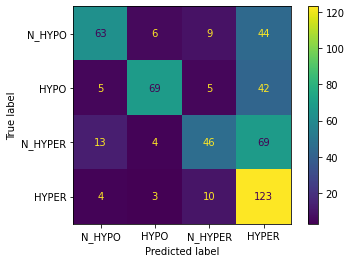

In [66]:
figure_metrics_workflow(cm, classes)


### functions

In [32]:
from scipy.stats import chisquare
import numpy as np

#function for khi2 expected frequencies
def exp_freq(cm): #/!\ makes a vertical sum
    df_exp_f = np.zeros(cm.shape) # create an empty dataframe for expected frequencies
    for i in range(cm.shape[1]):
        row = cm[i, :]
        exp = row.sum()/cm.shape[0] # get column's expected probability
        exp_col = np.full((cm.shape[0]),exp) # create row vector with 'exp' as values
        df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
    return df_exp_f

In [11]:
# Functions for binary model
import os
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

def sum_mat(mat):
# print sum of each row
    sum = 0 
    for i in range(mat.shape[1]):
        #print(mat[i, :].sum())
        sum += mat[i, :].sum()
    return sum


#XY = np.load('XY_data_split.npz', allow_pickle = True)
#Y_test = XY['Y_test']
#Y_pred = final_results['Y_pred']
def filter_Y(c1, c2, Y_test, Y_pred, c3 = None):
    filt_test = []
    filt_pred = []
    idx = 0 
    for item in Y_test:
        if c3 is not None:
            if item == c1 or item == c2 or item == c3:
                filt_test.append(Y_test[idx])
                filt_pred.append(Y_pred[idx])
        else:
            if item == c1 or item == c2:
                filt_test.append(Y_test[idx])
                filt_pred.append(Y_pred[idx])
        idx += 1
    
    return filt_test, filt_pred

# https://en.wikipedia.org/wiki/Sensitivity_and_specificity
def metrics22(cm, acc = True, sensibility = True, specificity = True):
    P = np.sum(cm,axis=1)[0] # sums first row
    N = np.sum(cm,axis=1)[1] # sums 2cd row
    TP = cm[0,0]
    TN = cm[1,1] # inverse diag.
    total = 0 
    for i in range(cm.shape[1]): total += cm[i, :].sum()
    acc = (TP+TN)/total 
    TPR = TP/P #  sensitivity
    TNR = TN/N # specificity
    #print(P,N,TP,TN,total)
    return acc, TPR ,TNR

def exp_freq(cm): #/!\ makes a vertical sum
    df_exp_f = np.zeros(cm.shape) # create an empty dataframe for expected frequencies
    for i in range(cm.shape[1]):
        row = cm[i, :]
        exp = row.sum()/cm.shape[0] # get column's expected probability
        exp_col = np.full((cm.shape[0]),exp) # create row vector with 'exp' as values
        df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
    return df_exp_f

def figure_metrics_workflow(cm,Y_pred,Y_test, class_ls,bin_met = True, roc = False):
    
    if bin_met:
        acc, TPR, TNR = metrics22(cm) 
        print('Accuracy: {:f}, Sensibility : {:f} and Specificity : {:f}'.format(acc, TPR, TNR))
        
    # confusion matrix
    ConfusionMatrixDisplay(cm, display_labels =  class_ls).plot()
    
    #Y_test = XY['Y_test']
   # Y_pred = final_results['Y_pred']  
    #filt_ytest, filt_ypred = filter_Y(cond1, cond2, Y_test, Y_pred)
    #print(filt_ytest, filt_ypred)
    if roc:    
        Y_test =[0 if i==1 else 1 if i==2 else i for i in Y_test] # converting 1,2 encoding for 0,1
        Y_pred =[0 if i==1 else 1 if i==2 else i for i in Y_pred]
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
        display.plot()
    
    #khi test
    ddof = (cm.shape[0] - 1)*(cm.shape[1]-1) # ddof id (2-1)(2-1) = 1
    chi2_results = chisquare(cm, f_exp = exp_freq(cm), ddof = ddof, axis = None) 
    print('Khi2({}, N={}) = {:f}, p={:f}'.format(ddof,sum_mat(cm), chi2_results[0],chi2_results[1]))

## Main contrast (binary)

In [60]:
ls = os.listdir(main_path)
ls

['SPMdata_bin_ANAHYPER',
 'SPMdata_bin_ANArun',
 'SPMdata_bin_ANArun_HYPERrun',
 'SPMdata_bin_HYPERrun',
 'SPMdata_bin_Ncond_ANAHYPER',
 'SPMdata_trainANArun_testHYPER_gs',
 'SPMdata_trainHYPERrun_testANA_gs',
 'SPM_multiclass_shuffsplit',
 'svc_5fold_pca',
 'svc_ANArun_HYPERrun',
 'svc_ANA_run',
 'svc_bin_ANAHYPO',
 'svc_HYPER_run',
 'svc_trainANA_testHyper',
 'svc_trainHyper_testHypo',
 'svc_trainSugg_testNeut']

In [12]:
p = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\final_GSS\ANA_HYPER'
pwd = os.chdir(p)

with open('final_results.pickle', 'rb') as handle:
        bin_hyperRun = pickle.load(handle)
with open('final_model_SVC.pickle', 'rb') as handle:
        model_bin_hyperRun = pickle.load(handle)    
with open('kfold_results.pickle', 'rb') as handle:
        kfold_bin_hyperRun = pickle.load(handle)
classes = ['N_HYPO', 'HYPO', 'N_HYPER', 'HYPER']
XY_hyperRun = np.load('XY_data_split.npz', allow_pickle = True)

Accuracy: 0.493056, Sensibility : 0.076389 and Specificity : 0.909722
Khi2(1, N=288) = 200.055556, p=0.000000


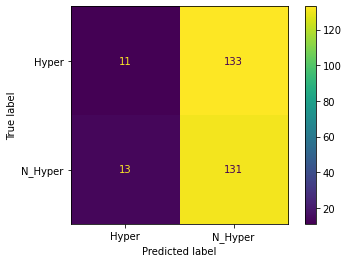

In [13]:
bin_hyperRun
hyperRun_class = ['Hyper', 'N_Hyper']
cm_hyperRun = bin_hyperRun['confusion_matrix']
figure_metrics_workflow(cm_hyperRun,bin_hyperRun,XY_hyperRun, hyperRun_class, roc=False)

### Hypo - hyperalgesia

Accuracy: 0.493056, Sensibility : 0.076389 and Specificity : 0.909722
Khi2(1, N=288) = 200.055556, p=0.000000


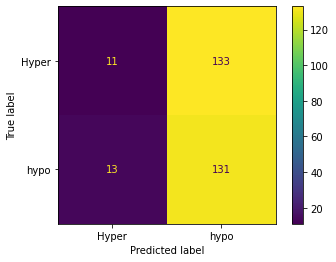

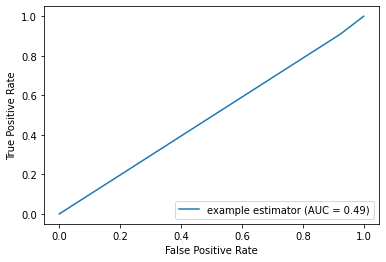

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
path = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\final_GSS\ANA_HYPER'
os.chdir(path)
with open('final_results.pickle', 'rb') as handle:
        final_results_sugg = pickle.load(handle)
with open('final_model_SVC.pickle', 'rb') as handle:
        model = pickle.load(handle) 
with open('kfold_results.pickle', 'rb') as handle:
        kfold_bin_hyperRun = pickle.load(handle)       
XY_sugg = np.load('XY_data_split.npz', allow_pickle = True)
Y_testsugg = XY_sugg['Y_test']

cm_sugg = final_results_sugg['confusion_matrix']
Y_predsugg = final_results_sugg['Y_pred']  
ls_sugg = ['Hypo', 'Hyper']

figure_metrics_workflow(cm_sugg,Y_predsugg, Y_testsugg, ['Hyper', 'hypo'], bin_met = True, roc=True) # 4='hyper', 2='hypo'


In [24]:
XY_sugg['X_train'].max()

23.656734

In [70]:
df = kfold_bin_hyperRun['df_fold_metrics'][:][:-1]
df.loc['mean'] = kfold_bin_hyperRun['df_fold_metrics'][:].mean()
df

,accuracy,balanced_accuracy,precision
fold1,0.472222,0.472222,0.433302
fold2,0.517361,0.517361,0.527341
fold3,0.527778,0.527778,0.553651
fold4,0.496528,0.496528,0.492586
fold5,0.506944,0.506944,0.511084
mean,0.504167,0.504167,0.503593


### run1 vs run 2


In [129]:
p = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\wpca\SPMdata_bin_ANArun_HYPERrun'
os.chdir(p)
pwd = os.getcwd()
print(pwd)
with open('final_results.pickle', 'rb') as handle:
    final_results = pickle.load(handle)
with open('final_model_SVC.pickle', 'rb') as handle:
        model = pickle.load(handle)    
#with open('kfold_results.pickle', 'rb') as handle:
        #kfold_results = pickle.load(handle)

E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\wpca\SPMdata_bin_ANArun_HYPERrun


In [133]:
final_results

{'y_pred_metrics':    accuracy  balanced_accuracy  precision
 0   0.76699           0.756377   0.805953,
 'Y_pred': array([2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2,
        2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
        1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2,
        1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
        2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
        1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2,
        2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
        2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
        2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2,
        2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 

dataframe of expected frequencies : 
[[121.5 121.5]
 [136.  136. ]]
Khi2 statistic = 219.790305 and p value = 0.000000 for degree of freedom = 1.000000


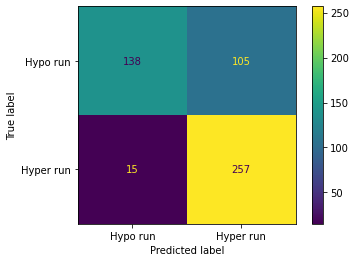

In [132]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = final_results['confusion_matrix']
cm_display = ConfusionMatrixDisplay(cm, display_labels = ['Hypo run','Hyper run']).plot()
df_exp_f = np.zeros(cm.shape) # create a dataframe for expected frequencies
for i in range(cm.shape[1]):
    row = cm[i, :]
    exp = row.sum()/cm.shape[0] # get column's expected probability
    exp_col = np.full((cm.shape[0]),exp) # create row vector with 'exp' as values
    df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
print('dataframe of expected frequencies : \n{}'.format(df_exp_f))
    
ddof = 1 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm, f_exp = df_exp_f, ddof = ddof, axis = None) 
print('Khi2 statistic = {:f} and p value = {:f} for degree of freedom = {:f}'.format(chi2_results[0],chi2_results[1],ddof))

### Hypo - N_hypo 

C:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.2.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Accuracy: 0.550000, Sensibility : 0.544444 and Specificity : 0.555556
Khi2(1, N=180) = 1.822222, p=0.402077


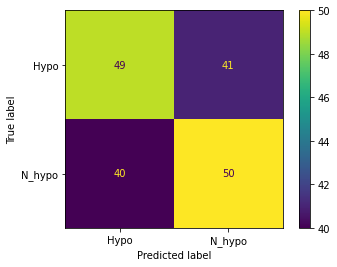

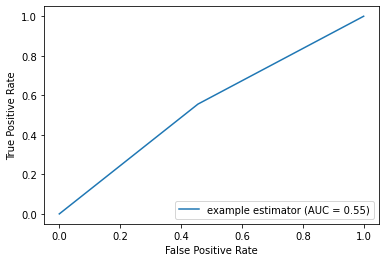

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
path = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\final_GSS\ANA_Nana'
os.chdir(path)
with open('final_results.pickle', 'rb') as handle:
        final_results_ANA = pickle.load(handle)
with open('final_model_SVC.pickle', 'rb') as handle:
        model = pickle.load(handle) 
with open('kfold_results.pickle', 'rb') as handle:
        kfold_bin_ANAN = pickle.load(handle)         
XY_ANA = np.load('XY_data_split.npz', allow_pickle = True)
Y_testANA = XY_ANA['Y_test']

cm_ANA = final_results_ANA['confusion_matrix']
Y_predANA = final_results_ANA['Y_pred']  
ls_ANA = ['Hypo', 'N_hypo']

figure_metrics_workflow(cm_ANA,Y_predANA, Y_testANA, ls_ANA, bin_met = True, roc=True) # 4='hyper', 2='hypo'


In [75]:

df = kfold_bin_ANAN['df_fold_metrics'][:][:-1]
df.loc['mean'] = kfold_bin_ANAN['df_fold_metrics'][:].mean()
df

,accuracy,balanced_accuracy,precision
fold1,0.561111,0.561111,0.561483
fold2,0.58046,0.58254,0.583545
fold3,0.616667,0.616667,0.620983
fold4,0.586207,0.589286,0.591912
fold5,0.538889,0.538889,0.542735
mean,0.576667,0.577698,0.580132


In [51]:
df_exp_f = np.zeros(cm_hypo_nhypo.shape) # create a dataframe for expected frequencies
for i in range(cm_hypo_nhypo.shape[1]):
    row = cm_hypo_nhypo[i, :]
    exp = row.sum()/cm_hypo_nhypo.shape[0] # get column's expected probability
    exp_col = np.full((cm_hypo_nhypo.shape[0]),exp) # create row vector with 'exp' as values
    df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
print('dataframe of expected frequencies : \n{}'.format(df_exp_f))
    
ddof = 1 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm_hypo_nhypo, f_exp = df_exp_f, ddof = ddof, axis = None) 
print('Khi2 statistic = {:f} and p value = {:f} for degree of freedom = {:f}'.format(chi2_results[0],chi2_results[1],ddof))

dataframe of expected frequencies : 
[[50.  50. ]
 [45.5 45.5]]
Khi2 statistic = 3.338901 and p value = 0.188351 for degree of freedom = 1.000000


### Hyper - N_hyper

C:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.2.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Accuracy: 0.542553, Sensibility : 0.500000 and Specificity : 0.586957
Khi2(1, N=282) = 4.173913, p=0.124064


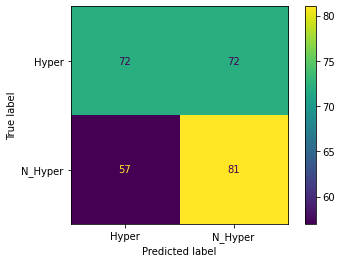

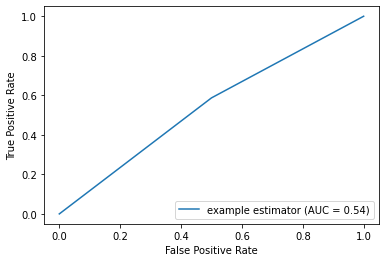

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
path = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\final_GSS\Hyper_Nhyper'
os.chdir(path)
with open('final_results.pickle', 'rb') as handle:
        final_results_HYPER = pickle.load(handle)
with open('final_model_SVC.pickle', 'rb') as handle:
        model = pickle.load(handle) 
with open('kfold_results.pickle', 'rb') as handle:
        kfold_bin_hyperN = pickle.load(handle)
XY_hyper = np.load('XY_data_split.npz', allow_pickle = True)
cm_hyper = final_results_HYPER['confusion_matrix']
Y_test = XY_hyper['Y_test']
Y_pred = final_results_HYPER['Y_pred']  
hyper_class = ['Hyper', 'N_Hyper']

figure_metrics_workflow(cm_hyper,Y_pred, Y_test, hyper_class, bin_met = True, roc=True) # 4='hyper', 2='hypo'


In [72]:
df = kfold_bin_hyperN['df_fold_metrics'][:][:-1]
df.loc['mean'] = kfold_bin_hyperRun['df_fold_metrics'][:].mean()
df

,accuracy,balanced_accuracy,precision
fold1,0.549645,0.549064,0.5492
fold2,0.53125,0.53125,0.536587
fold3,0.574468,0.572917,0.574537
fold4,0.524823,0.523249,0.523765
fold5,0.535461,0.536081,0.536181
mean,0.504167,0.504167,0.503593


### N_hypo - N_hyper

E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\wpca\SPMdata_bin_Ncond_ANAHYPER
dataframe of expected frequencies : 
[[64.5 64.5]
 [63.5 63.5]]
Khi2 statistic = 63.354941 and p value = 0.000000 for degree of freedom = 1.000000


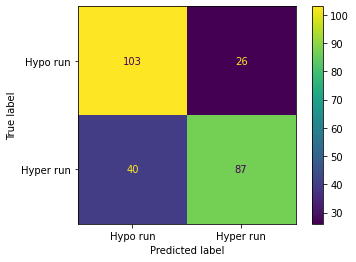

In [135]:
p = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\wpca\SPMdata_bin_Ncond_ANAHYPER'
os.chdir(p)
pwd = os.getcwd()
print(pwd)
with open('final_results.pickle', 'rb') as handle:
    final_results = pickle.load(handle)
with open('final_model_SVC.pickle', 'rb') as handle:
        model = pickle.load(handle)    
#with open('kfold_results.pickle', 'rb') as handle:
        #kfold_results = pickle.load(handle)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = final_results['confusion_matrix']
cm_display = ConfusionMatrixDisplay(cm, display_labels = ['Hypo run','Hyper run']).plot()
df_exp_f = np.zeros(cm.shape) # create a dataframe for expected frequencies
for i in range(cm.shape[1]):
    row = cm[i, :]
    exp = row.sum()/cm.shape[0] # get column's expected probability
    exp_col = np.full((cm.shape[0]),exp) # create row vector with 'exp' as values
    df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
print('dataframe of expected frequencies : \n{}'.format(df_exp_f))
    
ddof = 1 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm, f_exp = df_exp_f, ddof = ddof, axis = None) 
print('Khi2 statistic = {:f} and p value = {:f} for degree of freedom = {:f}'.format(chi2_results[0],chi2_results[1],ddof))

In [137]:
103+26+87+40

256

In [136]:
final_results

{'y_pred_metrics':    accuracy  balanced_accuracy  precision
 0  0.742188           0.741744   0.745096,
 'Y_pred': array([1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2,
        1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
        1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
        2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1,
        2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
        1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2,
        1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2,
        1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1,
        1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1,
        2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2], dtype=int64),
 'Y_sc

## Brain signatures

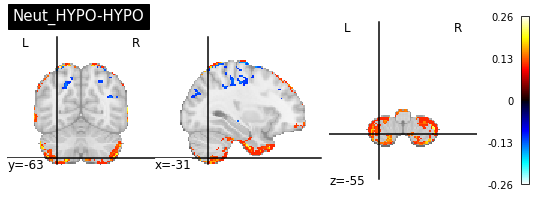

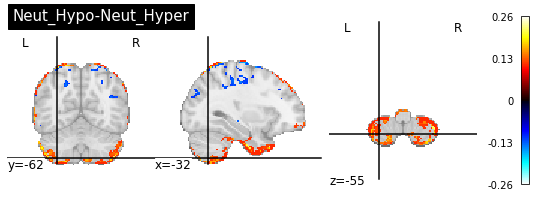

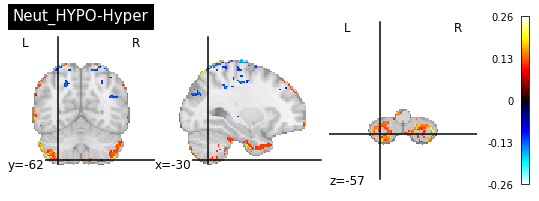

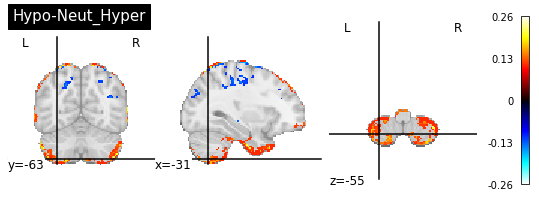

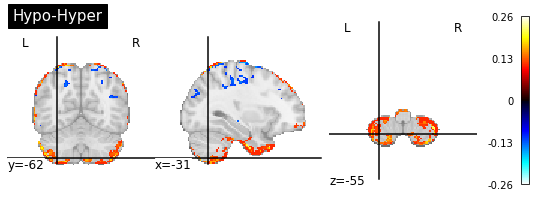

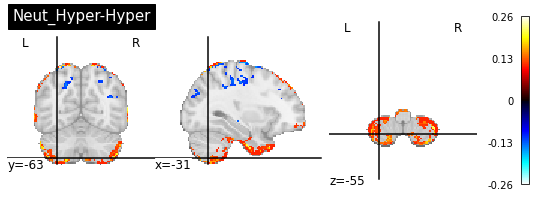

In [54]:
from nilearn import plotting
import nibabel as nib
from nilearn import image
title = ['','Neut_HYPO-HYPO','Neut_Hypo-Neut_Hyper','Neut_HYPO-Hyper', 'Hypo-Neut_Hyper', 'Hypo-Hyper', 'Neut_Hyper-Hyper']

for i in range(1,7):
    
    img = nib.load(f"coeffs_whole_brain_{i}.nii.gz")
    tresh_img = image.threshold_img(img, threshold = '99%')
    plotting.plot_stat_map(tresh_img,threshold= 0.0001,title = title[i] )
    #plotting.view_img(tresh_img, vmax=4, cut_coords=[-42, -16, 52], title="shock")
    #view = plotting.view_img_on_surf(tresh_img, threshold='90%', surf_mesh='fsaverage') 
    #view.open_in_browser() 

## Covariance correction

(Haufe et al., 2014)

That is, the activation pattern can be approximated by calculating the covariance Cov[x(n), y(n)]
(not the correlation Corr[x(n), y(n)]) of each single channel's data with the target variable, 
which amounts to a purely mass-univariate analysis.

For each classification dataset, we computed the mass-univariate correlation Corr[x(n), y(n)] of the class label with each channel reading, as well as the mass-univariate covariance Cov[x(n), y(n)]

C:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\nilearn\plotting\img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


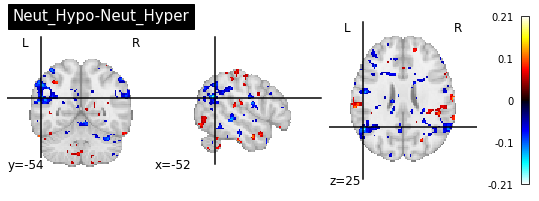

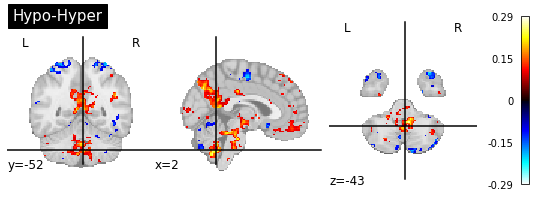

In [129]:
from nilearn import plotting
import nibabel as nib
from nilearn import image
from nilearn.plotting import view_img
title = ['','Neut_HYPO-HYPO','Neut_Hypo-Neut_Hyper','Neut_HYPO-Hyper', 'Hypo-Neut_Hyper', 'Hypo-Hyper', 'Neut_Hyper-Hyper']
path = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\wpca\SPM_multiclass_shuffsplit'
os.chdir(path)
for i in range(1,7):
     if i == 2 or i == 5:
        img = nib.load(f"eq6_adj_coeff_whole_brain_{i}.nii.gz")
        tresh_img = image.threshold_img(img, threshold = '99%')
        plotting.plot_stat_map(tresh_img,threshold= 0.0001,title = title[i] )
            #html_view = plotting.view_img(tresh_img, vmax=np.amax(tresh_img.get_data()), cut_coords=[-42, -16, 52], title = title[i])
        view = plotting.view_img_on_surf(tresh_img, threshold='90%', surf_mesh='fsaverage', title = title[i])
        #view.open_in_browser() 

        html_view = view_img(tresh_img, title="SVM weights", dim=-1)
        html_view.open_in_browser()

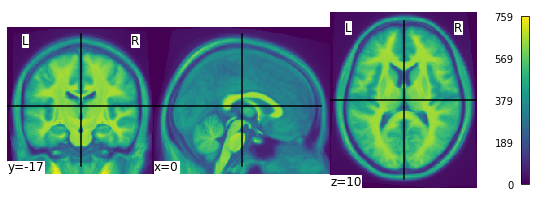

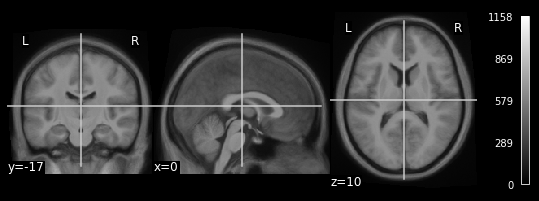

In [139]:
from nilearn.plotting import plot_anat, plot_img, plot_stat_map

plot_img(anat, colorbar=True, cbar_tick_format="%i")
plot_anat(anat, colorbar=True, cbar_tick_format="%i")

In [141]:
# test bin model hyper hypo
from nilearn import plotting
import nibabel as nib
from nilearn import image
title = ['','Neut_HYPO-HYPO','Neut_Hypo-Neut_Hyper','Neut_HYPO-Hyper', 'Hypo-Neut_Hyper', 'Hypo-Hyper', 'Neut_Hyper-Hyper']
path = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\wpca\SPMdata_bin_HYPERrun'
os.chdir(path)
anat = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\data_desmartaux\Avg_Anat\Avg_24subjs_T1.hdr'

img = nib.load(f"eq6_adj_coeff_whole_brain_{1}.nii.gz")
#tresh_img = image.threshold_img(img, threshold = '99%')
#plotting.plot_stat_map(tresh_img,threshold= 0.0001,title = title[i] )
#html_view = plotting.view_img(tresh_img, vmax=np.amax(tresh_img.get_data()), cut_coords=[-42, -16, 52], title = title[i])
view = plotting.view_img(anat, title = 'Hypo-Hyper bin model')
view.open_in_browser() 


In [1]:
### Mosaic for a specific contrast
from nilearn import plotting
import nibabel as nib
from nilearn import image
title = ['','Neut_HYPO-HYPO','Neut_Hypo-Neut_Hyper','Neut_HYPO-Hyper', 'Hypo-Neut_Hyper', 'Hypo-Hyper', 'Neut_Hyper-Hyper']

for i in range(1,7):
    if i == 2 or i == 5: # to visualize Neut_Hypo-Neut_Hyper and Hypo-Hyper
        img = nib.load(f"eq6_adj_coeff_whole_brain_{i}.nii.gz")
        tresh_img = image.threshold_img(img, threshold = '99%')
        plotting.plot_stat_map(tresh_img, display_mode='mosaic', cut_coords=(15, 15, 15),
                               title=title[i])

FileNotFoundError: No such file or no access: 'eq6_adj_coeff_whole_brain_2.nii.gz'

In [ ]:
### N

In [ ]:

i = 5 # 5 is hypo-hyper 
img = nib.load(f"eq6_adj_coeff_whole_brain_{i}.nii.gz")
tresh_img = image.threshold_img(img, threshold = '99%')
plotting.plot_stat_map(tresh_img, display_mode='mosaic', cut_coords=(15, 15, 15),
                       title="display_mode='mosaic' default cut_coords")

In [131]:
from nilearn import image
for i in range(1,7):
    
    img = nib.load(f"eq6_adj_coeff_whole_brain_{i}.nii.gz")
    tresh_img = image.threshold_img(img, threshold = '99%')
    #smooth_anat_img = image.smooth_img(img, fwhm=4)
    #plotting.plot_stat_map(tresh_img,threshold= 0.0001,title = title[i] )
    html_view = plotting.view_img(tresh_img, vmax=np.amax(tresh_img.get_data()), cut_coords=[-42, -16, 52], title = title[i])
    #view = plotting.view_img_on_surf(tresh_img, threshold='90%', surf_mesh='fsaverage', title = title[i])
    html_view.open_in_browser() 
 



C:\Users\Dylan\AppData\Local\Temp\ipykernel_249296\1370144337.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  html_view = plotting.view_img(tresh_img, vmax=np.amax(tresh_img.get_data()), cut_coords=[-42, -16, 52], title = title[i])
C:\Users\Dylan\AppData\Local\Temp\ipykernel_249296\1370144337.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  html_view = plotting.view_img(tresh_img, vmax=np.amax(tresh_img.get_data()), cut_coords=[-42, -16, 52], title = title[i]

# SVC on ANA run

In [106]:
p = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\wpca\SPMdata_bin_ANArun'
os.chdir(p)
pwd = os.getcwd()
print(pwd)
with open('final_results.pickle', 'rb') as handle:
    final_results = pickle.load(handle)
with open('final_model_SVC.pickle', 'rb') as handle:
        model = pickle.load(handle)    
#with open('kfold_results.pickle', 'rb') as handle:
        #kfold_results = pickle.load(handle)

E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\wpca\SPMdata_bin_ANArun


In [107]:
final_results

{'y_pred_metrics':    accuracy  balanced_accuracy  precision
 0  0.856589           0.856911   0.859047,
 'Y_pred': array([2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1,
        1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2,
        1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1,
        2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1,
        1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2,
        2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1,
        2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,
        1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1,
        2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1,
        1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1,
        1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2], dtype=int64),


dataframe of expected frequencies : 
[[64. 64.]
 [65. 65.]]
Khi2 statistic = 133.004327 and p value = 0.000000 for degree of freedom = 1.000000


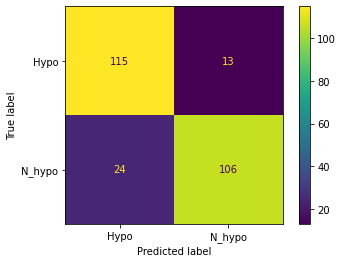

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = final_results['confusion_matrix']
cm_display = ConfusionMatrixDisplay(cm, display_labels = ['Hypo','N_hypo']).plot()

df_exp_f = np.zeros(cm.shape) # create a dataframe for expected frequencies
for i in range(cm.shape[1]):
    row = cm[i, :]
    exp = row.sum()/cm.shape[0] # get column's expected probability
    exp_col = np.full((cm.shape[0]),exp) # create row vector with 'exp' as values
    df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
print('dataframe of expected frequencies : \n{}'.format(df_exp_f))
    
ddof = 1 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm, f_exp = df_exp_f, ddof = ddof, axis = None) 
print('Khi2 statistic = {:f} and p value = {:f} for degree of freedom = {:f}'.format(chi2_results[0],chi2_results[1],ddof))

# SVC on HYPER run

In [111]:
p = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\wpca\SPMdata_bin_HYPERrun'
os.chdir(p)
pwd = os.getcwd()
print(pwd)
with open('final_results.pickle', 'rb') as handle:
    final_results = pickle.load(handle)
with open('final_model_SVC.pickle', 'rb') as handle:
        model = pickle.load(handle)    
#with open('kfold_results.pickle', 'rb') as handle:
        #kfold_results = pickle.load(handle)

E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\wpca\SPMdata_bin_HYPERrun


In [112]:
final_results

{'y_pred_metrics':    accuracy  balanced_accuracy  precision
 0  0.674419           0.676442   0.741606,
 'Y_pred': array([1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
        1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
        1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1,
        1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
        1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1,
        2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
        1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
        1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2], dtype=int64),


dataframe of expected frequencies : 
[[64. 64.]
 [65. 65.]]
Khi2 statistic = 101.723077 and p value = 0.000000 for degree of freedom = 1.000000


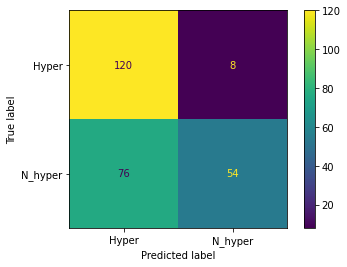

In [113]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = final_results['confusion_matrix']
cm_display = ConfusionMatrixDisplay(cm, display_labels = ['Hyper','N_hyper']).plot()
df_exp_f = np.zeros(cm.shape) # create a dataframe for expected frequencies
for i in range(cm.shape[1]):
    row = cm[i, :]
    exp = row.sum()/cm.shape[0] # get column's expected probability
    exp_col = np.full((cm.shape[0]),exp) # create row vector with 'exp' as values
    df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
print('dataframe of expected frequencies : \n{}'.format(df_exp_f))
    
ddof = 1 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm, f_exp = df_exp_f, ddof = ddof, axis = None) 
print('Khi2 statistic = {:f} and p value = {:f} for degree of freedom = {:f}'.format(chi2_results[0],chi2_results[1],ddof))

## Train on hyper run and test on hypo run
    - target = 1 : modulation (Hyer/hypo)
    - target = 2 : Neutral cond.
    Accuracy = 

In [120]:
p = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\wpca\SPMdata_trainHYPERrun_testANA_gs'
os.chdir(p)
pwd = os.getcwd()
print(pwd)
with open('final_results.pickle', 'rb') as handle:
    final_results = pickle.load(handle)
with open('final_model_SVC.pickle', 'rb') as handle:
        model = pickle.load(handle)   

E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\wpca\SPMdata_trainHYPERrun_testANA_gs


In [121]:
final_results

{'y_pred_metrics':    accuracy  balanced_accuracy  precision
 0  0.547786           0.545872   0.565535,
 'Y_pred': array([1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
        2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
        2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
        1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
        2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 

dataframe of expected frequencies : 
[[64. 64.]
 [65. 65.]]
Khi2 statistic = 101.723077 and p value = 0.000000 for degree of freedom = 1.000000


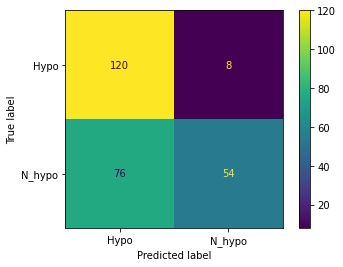

In [116]:
#classes = ['N_HYPO', 'HYPO', 'N_HYPER', 'HYPER']
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm, display_labels = ['Hypo','N_hypo']).plot()
df_exp_f = np.zeros(cm.shape) # create a dataframe for expected frequencies
for i in range(cm.shape[1]):
    row = cm[i, :]
    exp = row.sum()/cm.shape[0] # get column's expected probability
    exp_col = np.full((cm.shape[0]),exp) # create row vector with 'exp' as values
    df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
print('dataframe of expected frequencies : \n{}'.format(df_exp_f))
    
ddof = 1 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm, f_exp = df_exp_f, ddof = ddof, axis = None) 
print('Khi2 statistic = {:f} and p value = {:f} for degree of freedom = {:f}'.format(chi2_results[0],chi2_results[1],ddof))

## Train on Hypo run and test on Hyper run
    - target = 1 : modulation (Hyer/hypo)
    - target = 2 : Neutral cond.
    Accuracy =

In [122]:
p = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\wpca\SPMdata_trainANArun_testHYPER_gs'
os.chdir(p)
pwd = os.getcwd()
print(pwd)
with open('final_results.pickle', 'rb') as handle:
    final_results = pickle.load(handle)
with open('final_model_SVC.pickle', 'rb') as handle:
        model = pickle.load(handle)   

E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\wpca\SPMdata_trainANArun_testHYPER_gs


dataframe of expected frequencies : 
[[216. 216.]
 [213. 213.]]
Khi2 statistic = 1.852374 and p value = 0.396061 for degree of freedom = 1.000000


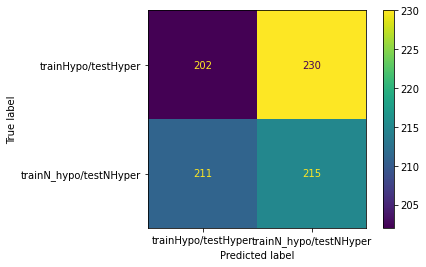

In [123]:
import numpy as np
cm = np.array([[202, 230],                                                                                                [211, 215]])
#classes = ['N_HYPO', 'HYPO', 'N_HYPER', 'HYPER']
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm, display_labels = ['trainHypo/testHyper','trainN_hypo/testNHyper']).plot()
df_exp_f = np.zeros(cm.shape) # create a dataframe for expected frequencies
for i in range(cm.shape[1]):
    row = cm[i, :]
    exp = row.sum()/cm.shape[0] # get column's expected probability
    exp_col = np.full((cm.shape[0]),exp) # create row vector with 'exp' as values
    df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
print('dataframe of expected frequencies : \n{}'.format(df_exp_f))
    
ddof = 1 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm, f_exp = df_exp_f, ddof = ddof, axis = None) 
print('Khi2 statistic = {:f} and p value = {:f} for degree of freedom = {:f}'.format(chi2_results[0],chi2_results[1],ddof))

## Trained on Hypo/hyper and tested on N_hypo/N_hyper

In [3]:
import numpy as np 
cm =np.array([[216,210],[140,286]]) 

dataframe of expected frequencies : 
[[213. 213.]
 [213. 213.]]
Khi2 statistic = 50.122066 and p value = 0.000000 for degree of freedom = 1.000000


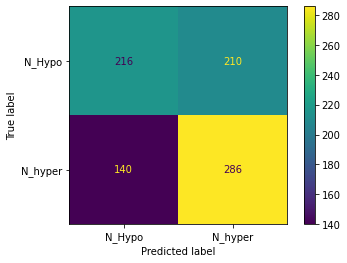

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import chisquare
import numpy as np

cm_display = ConfusionMatrixDisplay(cm, display_labels = ['N_Hypo','N_hyper']).plot()

df_exp_f = np.zeros(cm.shape) # create a dataframe for expected frequencies
for i in range(cm.shape[1]):
    row = cm[i, :]
    exp = row.sum()/cm.shape[0] # get column's expected probability
    exp_col = np.full((cm.shape[0]),exp) # create row vector with 'exp' as values
    df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
print('dataframe of expected frequencies : \n{}'.format(df_exp_f))
    
ddof = 1 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm, f_exp = df_exp_f, ddof = ddof, axis = None) 
print('Khi2 statistic = {:f} and p value = {:f} for degree of freedom = {:f}'.format(chi2_results[0],chi2_results[1],ddof))

### Manual pipeline test 03-01-23

In [15]:
import os 
import pandas as pd
import glob as glob
import numpy as np

In [ ]:
##

In [86]:
os.chdir(r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\gss_svc\bin_runs')


In [87]:
import pickle

with open('final_model_SVC.pickle', 'rb') as handle:
        model = pickle.load(handle)
with open('kfold_results.pickle', 'rb') as handle:
        kf = pickle.load(handle)   
n_componentsPCA = kf['pca_n_components']


In [88]:
kf

{'pca_n_components': [0.7, 0.8, 0.85, 0.9, 0.95, 1],
 'PC_values': [array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
          27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
          40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
          53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
          66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
          79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
          92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
         105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
         118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
         131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
         144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
         157, 158, 159, 160, 161, 162, 163, 16

In [89]:
val = kf['PC_values']
var = kf['PC_var']

n_componentsPCA : 0.7


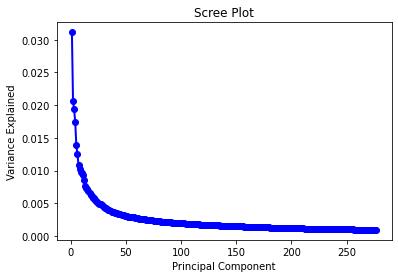

n_componentsPCA : 0.8


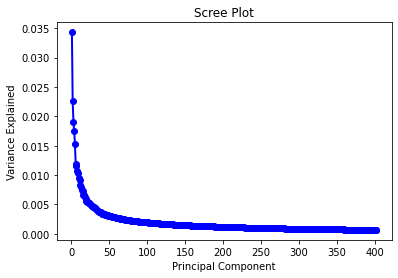

n_componentsPCA : 0.85


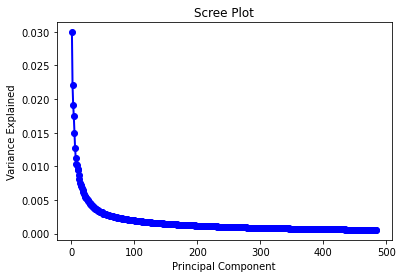

n_componentsPCA : 0.9


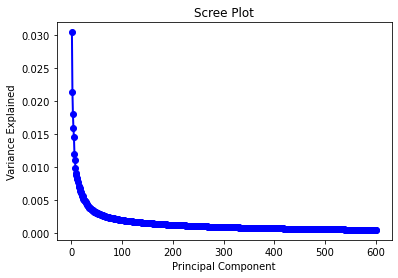

n_componentsPCA : 0.95


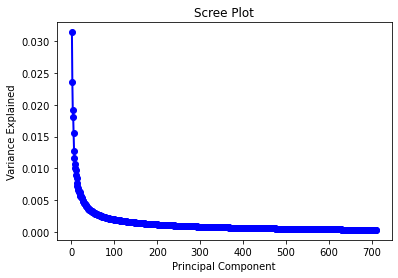

In [67]:
import matplotlib.pyplot as plt
import numpy as np

for i, arr in enumerate(val):
    
    plt.plot(val[i], var[i], 'o-', linewidth=2, color='blue')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    print('n_componentsPCA :', n_componentsPCA[i] )
    plt.show()

### bin_runs (.20-1 var explained in PCA)

In [77]:
os.chdir(r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\gss_svc\bin_runs_pca20-1')

In [79]:
import pickle

with open('final_model_SVC.pickle', 'rb') as handle:
        model = pickle.load(handle)
with open('kfold_results.pickle', 'rb') as handle:
        kf = pickle.load(handle)   
n_componentsPCA = kf['pca_n_components']


In [80]:
val = kf['PC_values']
var = kf['PC_var']

In [81]:
kf


{'pca_n_components': [0.2, 0.4, 0.6, 0.9, 0.95, 1],
 'PC_values': [array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
        dtype=int64),
  array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
         35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
         52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68],
        dtype=int64),
  array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
          27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
          40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
          53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
          66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
          79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  

n_componentsPCA : 0.2


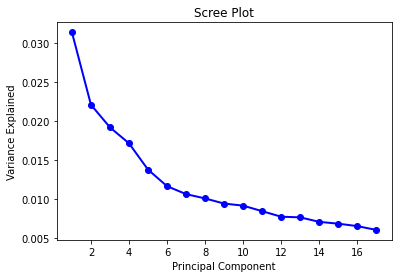

n_componentsPCA : 0.4


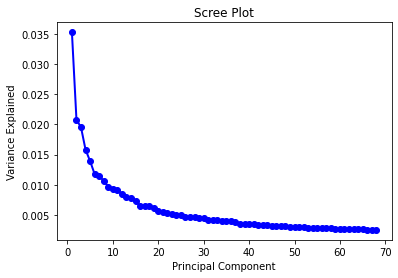

n_componentsPCA : 0.6


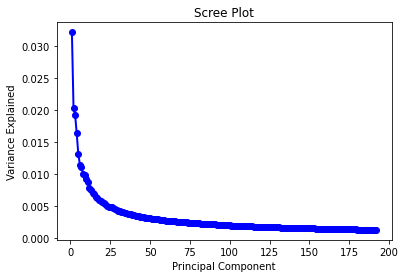

n_componentsPCA : 0.9


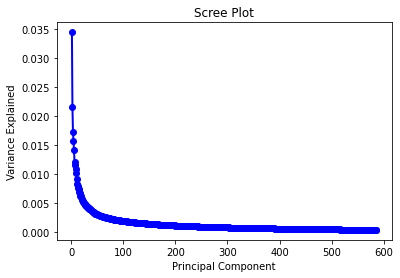

n_componentsPCA : 0.95


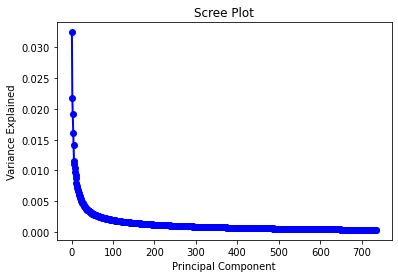

In [71]:
import matplotlib.pyplot as plt
import numpy as np

for i, arr in enumerate(val):
    
    plt.plot(val[i], var[i], 'o-', linewidth=2, color='blue')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    print('n_componentsPCA :', n_componentsPCA[i] )
    plt.show()

In [152]:
import os
import numpy as np
os.chdir(r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\result_GLM')

In [172]:
Xf = np.load('X_data.npz', allow_pickle = True)
Yf = np.load('Y_data.npz', allow_pickle = True)
grf = np.load('gr_data.npz', allow_pickle = True)

In [175]:

X = Xf['X']
Y = Yf['Y']
gr = grf['gr']

In [176]:
X.shape

(108, 216734)

In [177]:
Y.shape
Y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=object)

In [178]:
gr.shape


(108,)

In [179]:
names = []
for f in files:
    names.append(f[-38:])
print(names,Y,gr)

['\\APM_07_H1_ANA_TxT_shocks_con_0024.hdr', '\\APM_07_H1_ANA_TxT_shocks_con_0025.hdr', '\\APM_07_H1_ANA_TxT_shocks_con_0026.hdr', '\\APM_07_H1_ANA_TxT_shocks_con_0027.hdr', '\\APM_07_H1_ANA_TxT_shocks_con_0028.hdr', '\\APM_07_H1_ANA_TxT_shocks_con_0029.hdr', '\\APM_07_H1_ANA_TxT_shocks_con_0030.hdr', '\\APM_07_H1_ANA_TxT_shocks_con_0031.hdr', '\\APM_07_H1_ANA_TxT_shocks_con_0032.hdr', '\\APM_07_H1_ANA_TxT_shocks_con_0033.hdr', '\\APM_07_H1_ANA_TxT_shocks_con_0034.hdr', '\\APM_07_H1_ANA_TxT_shocks_con_0035.hdr', '\\APM_07_H1_ANA_TxT_shocks_con_0036.hdr', '\\APM_07_H1_ANA_TxT_shocks_con_0037.hdr', '\\APM_07_H1_ANA_TxT_shocks_con_0038.hdr', '\\APM_07_H1_ANA_TxT_shocks_con_0039.hdr', '\\APM_07_H1_ANA_TxT_shocks_con_0040.hdr', '\\APM_07_H1_ANA_TxT_shocks_con_0041.hdr', 'PM_07_H1_HYPER_TxT_shocks_con_0065.hdr', 'PM_07_H1_HYPER_TxT_shocks_con_0066.hdr', 'PM_07_H1_HYPER_TxT_shocks_con_0067.hdr', 'PM_07_H1_HYPER_TxT_shocks_con_0068.hdr', 'PM_07_H1_HYPER_TxT_shocks_con_0069.hdr', 'PM_07_H1_HYPER

In [180]:
len(Y)

108

In [181]:
def encode_classes(data, gr):

    #Y data
    y_colnames = ['filename', 'target', 'condition', 'group']
    df_target = pd.DataFrame(columns = y_colnames)
    index = 0
    for file in data:

            #filename col
        filename = os.path.basename(os.path.normpath(file))#get file name from path
        df_target.loc[index, 'filename'] = filename #add file to coord (index,'filnames')

        # encoding classes associated with each file in data
        if 'ANA' in filename:
            if 'N_ANA' in filename:
                target = 1 #hypo neutral
                cond = 'N_HYPO'

            else:#Hypo
                target = 2
                cond = 'HYPO'

        else : #hyper
            if 'N_HYPER' in filename:
                target = 3
                cond = 'N_HYPER'
            else:
                target = 4
                cond = 'HYPER'
            #print('attributed : ', target, 'as target and :', cond, 'as condition')
            #print('-----------')
        df_target.loc[index, 'target'] = target
        df_target.loc[index, 'condition'] = cond

        index += 1
    df_target['group'] = gr
    cond_target = ['1 = N_ANA', '2 = HYPO', '3 = N_HYPER', '4 = HYPER']

    return df_target, cond_target


In [182]:
df, ct = encode_classes(names,gr)

In [183]:

pd.set_option('display.max_rows',df.shape[0]+1)
display(df)

,filename,target,condition,group
0,APM_07_H1_ANA_TxT_shocks_con_0024.hdr,2,HYPO,1
1,APM_07_H1_ANA_TxT_shocks_con_0025.hdr,2,HYPO,1
2,APM_07_H1_ANA_TxT_shocks_con_0026.hdr,2,HYPO,1
3,APM_07_H1_ANA_TxT_shocks_con_0027.hdr,2,HYPO,1
4,APM_07_H1_ANA_TxT_shocks_con_0028.hdr,2,HYPO,1
5,APM_07_H1_ANA_TxT_shocks_con_0029.hdr,2,HYPO,1
6,APM_07_H1_ANA_TxT_shocks_con_0030.hdr,2,HYPO,1
7,APM_07_H1_ANA_TxT_shocks_con_0031.hdr,2,HYPO,1
8,APM_07_H1_ANA_TxT_shocks_con_0032.hdr,2,HYPO,1
9,APM_07_H1_ANA_TxT_shocks_con_0033.hdr,2,HYPO,1
